# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
%matplotlib inline

# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import collections
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
#Named tutple used for the data frame and plotting
__WthrData__ = collections.namedtuple('__WthrData__',
                                       ['city',
                                        'clouds',
                                        'country',
                                        'date',
                                        'humidity',
                                        'latitude',
                                        'longitude',
                                        'max_temp',
                                        'wind'])

WthrData = __WthrData__("City",
                        "Cloudiness",
                        "Country",
                        "Date",
                        "Humidity",
                        "Latitude",
                        "Longitude",
                        "Max Temperture in (F)",
                        "Wind Speed")

#empty data frame
weather_df = pd.DataFrame()

#Main URL
url = "http://api.openweathermap.org/data/2.5/weather?"

current = 0
total = len(cities)

#Iterate ove the cities
for city in cities:
    #update the counter
    current= current + 1;
    #Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    print(f"Quering: {city}, iteration {current} out of {total}")
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #Append the data to the data frame
    try:
        weather_df = weather_df.append({WthrData.city     : city,
                                        WthrData.clouds   : weather_json['clouds']['all'],
                                        WthrData.country  : weather_json['sys']['country'],
                                        WthrData.date     : weather_json['dt'],
                                        WthrData.humidity : weather_json['main']['humidity'],
                                        WthrData.latitude : weather_json['coord']['lat'],
                                        WthrData.longitude: weather_json['coord']['lon'],
                                        WthrData.max_temp : (9/5)*((weather_json['main']['temp_max']) - 273) + 32,
                                        WthrData.wind     : weather_json['wind']['speed']},
                                        ignore_index=True)
    except KeyError as error:
        print(f"[Error]: City {city} was not found")


Quering: pisco, iteration 1 out of 605
Quering: liepaja, iteration 2 out of 605
Quering: east london, iteration 3 out of 605
Quering: kapaa, iteration 4 out of 605
Quering: ostersund, iteration 5 out of 605
Quering: ushuaia, iteration 6 out of 605
Quering: hilo, iteration 7 out of 605
Quering: buariki, iteration 8 out of 605
[Error]: City buariki was not found
Quering: busselton, iteration 9 out of 605
Quering: bredasdorp, iteration 10 out of 605
Quering: oakdale, iteration 11 out of 605
Quering: san policarpo, iteration 12 out of 605
Quering: rikitea, iteration 13 out of 605
Quering: khatanga, iteration 14 out of 605
Quering: tarazona, iteration 15 out of 605
Quering: barentsburg, iteration 16 out of 605
[Error]: City barentsburg was not found
Quering: negombo, iteration 17 out of 605
Quering: mar del plata, iteration 18 out of 605
Quering: port elizabeth, iteration 19 out of 605
Quering: poronaysk, iteration 20 out of 605
Quering: rawannawi, iteration 21 out of 605
[Error]: City rawa

Quering: akhalgori, iteration 179 out of 605
Quering: saint-georges, iteration 180 out of 605
Quering: belaya gora, iteration 181 out of 605
Quering: himora, iteration 182 out of 605
[Error]: City himora was not found
Quering: marawi, iteration 183 out of 605
Quering: bagotville, iteration 184 out of 605
Quering: berlevag, iteration 185 out of 605
Quering: caucaia, iteration 186 out of 605
Quering: xichang, iteration 187 out of 605
Quering: sentyabrskiy, iteration 188 out of 605
[Error]: City sentyabrskiy was not found
Quering: viligili, iteration 189 out of 605
[Error]: City viligili was not found
Quering: clyde river, iteration 190 out of 605
Quering: novo aripuana, iteration 191 out of 605
Quering: norman wells, iteration 192 out of 605
Quering: iqaluit, iteration 193 out of 605
Quering: shimoda, iteration 194 out of 605
Quering: lebu, iteration 195 out of 605
Quering: mikhaylovka, iteration 196 out of 605
Quering: maua, iteration 197 out of 605
Quering: souillac, iteration 198 out 

Quering: geraldton, iteration 344 out of 605
Quering: usak, iteration 345 out of 605
Quering: kloulklubed, iteration 346 out of 605
Quering: san clemente, iteration 347 out of 605
Quering: walvis bay, iteration 348 out of 605
Quering: saint george, iteration 349 out of 605
Quering: tuttlingen, iteration 350 out of 605
Quering: monster, iteration 351 out of 605
Quering: novyy urengoy, iteration 352 out of 605
Quering: ixtapa, iteration 353 out of 605
Quering: sapucaia, iteration 354 out of 605
Quering: zuwarah, iteration 355 out of 605
Quering: tias, iteration 356 out of 605
Quering: monticello, iteration 357 out of 605
Quering: doctor pedro p. pena, iteration 358 out of 605
[Error]: City doctor pedro p. pena was not found
Quering: tutoia, iteration 359 out of 605
Quering: quelimane, iteration 360 out of 605
Quering: balkhash, iteration 361 out of 605
Quering: auki, iteration 362 out of 605
Quering: sinnamary, iteration 363 out of 605
Quering: tiksi, iteration 364 out of 605
Quering: ta

Quering: teguldet, iteration 516 out of 605
Quering: kangaatsiaq, iteration 517 out of 605
Quering: talavera de la reina, iteration 518 out of 605
Quering: santa maria, iteration 519 out of 605
Quering: plover, iteration 520 out of 605
Quering: hovd, iteration 521 out of 605
Quering: qasigiannguit, iteration 522 out of 605
Quering: masterton, iteration 523 out of 605
Quering: ossora, iteration 524 out of 605
Quering: emilio carranza, iteration 525 out of 605
Quering: brokopondo, iteration 526 out of 605
Quering: baykit, iteration 527 out of 605
Quering: bangsund, iteration 528 out of 605
Quering: samarai, iteration 529 out of 605
Quering: vestmanna, iteration 530 out of 605
Quering: tazmalt, iteration 531 out of 605
Quering: loukhi, iteration 532 out of 605
Quering: nome, iteration 533 out of 605
Quering: paulista, iteration 534 out of 605
Quering: oranjestad, iteration 535 out of 605
Quering: kasaragod, iteration 536 out of 605
Quering: entebbe, iteration 537 out of 605
Quering: aykha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
try:
    __thisdir__ = os.path.dirname(os.path.abspath(__file__))
except NameError as error:
    __thisdir__ = "."

#Define the place to store the images
__data_path__ = os.path.join(__thisdir__,"data")
if not os.path.isdir(__data_path__):
    os.mkdir(__data_path__)
    
#Define the place to store the images
image_path = os.path.join(__thisdir__,"images")
if not os.path.isdir(image_path):
    os.mkdir(image_path)
    
__csv_path__ = os.path.join(__data_path__,"weather_data.csv")

weather_df.to_csv(__csv_path__,index=False)

In [65]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperture in (F),Wind Speed
0,pisco,75.0,PE,1.561603e+09,87.0,-13.71,-76.20,61.070,1.00
1,liepaja,88.0,LV,1.561603e+09,88.0,56.52,21.02,66.470,3.10
2,east london,23.0,ZA,1.561603e+09,46.0,-33.02,27.91,61.520,6.78
3,kapaa,75.0,US,1.561603e+09,78.0,22.08,-159.32,80.870,5.10
4,ostersund,19.0,SE,1.561603e+09,81.0,63.18,14.64,49.262,8.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

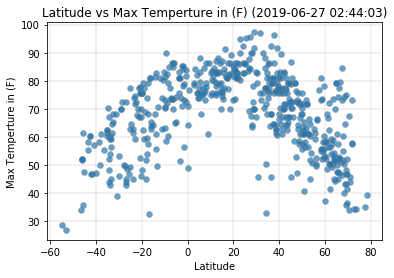

In [71]:
ts = weather_df[WthrData.date][0]
date = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

#Figure for the plot
la_vs_temp_mpl = plt.figure(figsize=(6,4))
plt.scatter(x=weather_df[WthrData.latitude],
            y=weather_df[WthrData.max_temp],                                       
            alpha=0.7,
            edgecolor="grey",
            linewidth=0.5)

plt.title(f"{WthrData.latitude} vs {WthrData.max_temp} ({date})")
plt.xlabel(WthrData.latitude)
plt.ylabel(WthrData.max_temp)
plt.grid(color='grey',linewidth=0.2)

# Save Figure
__lat_temp_plt_path__ = os.path.join(image_path,"lat_vs_temp.png")
plt.savefig(__lat_temp_plt_path__)

plt.show()

#### Latitude vs. Humidity Plot

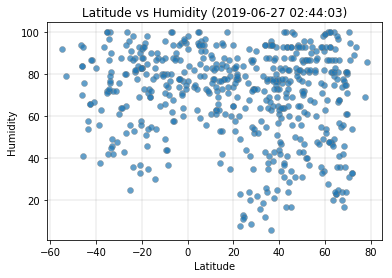

In [72]:
#Figure for the plot
lat_vs_hmy_mpl = plt.figure(figsize=(6,4))
plt.scatter(x=weather_df[WthrData.latitude],
            y=weather_df[WthrData.humidity],                                       
            alpha=0.7,
            edgecolor="grey",
            linewidth=0.5)

plt.title(f"{WthrData.latitude} vs {WthrData.humidity} ({date})")
plt.xlabel(WthrData.latitude)
plt.ylabel(WthrData.humidity)
plt.grid(color='grey',linewidth=0.2)

# Save Figure
__lat_hmdy_plt_path__ = os.path.join(image_path,"lat_vs_hmdty.png")
plt.savefig(__lat_hmdy_plt_path__)

plt.show()

#### Latitude vs. Cloudiness Plot

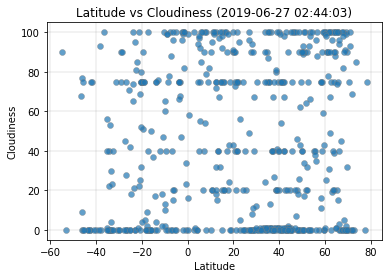

In [73]:
#Figure for the plot
lat_vs_cloud_mpl = plt.figure(figsize=(6,4))
plt.scatter(x=weather_df[WthrData.latitude],
            y=weather_df[WthrData.clouds],                                       
            alpha=0.7,
            edgecolor="grey",
            linewidth=0.5)

plt.title(f"{WthrData.latitude} vs {WthrData.clouds} ({date})")
plt.xlabel(WthrData.latitude)
plt.ylabel(WthrData.clouds)
plt.grid(color='grey',linewidth=0.2)

# Save Figure
__lat_cloud_plt_path__ = os.path.join(image_path,"lat_vs_cloud.png")
plt.savefig(__lat_cloud_plt_path__)

plt.show()

#### Latitude vs. Wind Speed Plot

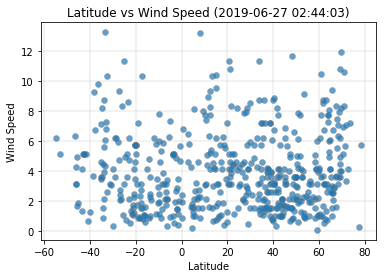

In [74]:
#Figure for the plot
lat_vs_speed_mpl = plt.figure(figsize=(6,4))
plt.scatter(x=weather_df[WthrData.latitude],
            y=weather_df[WthrData.wind],                                       
            alpha=0.7,
            edgecolor="grey",
            linewidth=0.5)

plt.title(f"{WthrData.latitude} vs {WthrData.wind} ({date})")
plt.xlabel(WthrData.latitude)
plt.ylabel(WthrData.wind)
plt.grid(color='grey',linewidth=0.2)

# Save Figure
__lat_wind_plt_path__ = os.path.join(image_path,"lat_vs_wind.png")
plt.savefig(__lat_wind_plt_path__)

plt.show()

## Trends

1.- Higher temperatures are register between 20 and 40 degrees. This means that the assumption we do when we say that the closer  we are to the equator the hotter it gets, is not true. Since equator is located at latitude 0 and it is hotter temperatures are registered between 20 and 40 degrees.

2.- We can see that the humidity values are higher than 20 for most of the latitude except from 20 to 40 degrees.  This range registered the lower humidity levels.

3.- Most of the cloudiness is concentrated close to 100 and close 0. This means that most of the cities have either a lot of clods or nothing. From 20 to 40 degrees the cloudiness id close to 0.

4.- Most of the cites register a wind speed lower than 6.
